<h1><center>Roller Coaster Rankings</center></h1>

# Visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

wood.rename(columns={'Rank':'rank_', 'Name':'name', 'Park':'park', 'Supplier':'supplier', 'Year Built':'year_build',
                     'Points':'points', 'Year of Rank':'year_of_rank'}, inplace=True)

steel.rename(columns={'Rank':'rank_', 'Name':'name', 'Park':'park', 'Supplier':'supplier', 'Year Built':'year_build',
                     'Points':'points', 'Year of Rank':'year_of_rank'}, inplace=True)

display(wood)

display(steel)


,rank_,name,park,Location,supplier,year_build,points,year_of_rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
...,...,...,...,...,...,...,...,...
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018


,rank_,name,park,Location,supplier,year_build,points,year_of_rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


In [3]:
#Both wood and steel
plantilla = pd.concat([wood,steel])
plantilla = plantilla[['name', 'park','rank_', 'year_of_rank']].sort_values('year_of_rank')
plantilla

,name,park,rank_,year_of_rank
0,Boulder Dash,Lake Compounce,1,2013
9,Intimidator-305,Kings Dominion,10,2013
8,Magnum XL-200,Cedar Point,9,2013
7,Intimidator,Carowinds,8,2013
6,Goliath,Six Flags Over Georgia,7,2013
...,...,...,...,...
158,Cyclone,Luna Park/Coney Island,29,2018
157,Colossos,Heide Park,28,2018
156,Cú Chulainn,Tayto Park,27,2018
166,Blue Streak,Conneaut Lake Park,37,2018


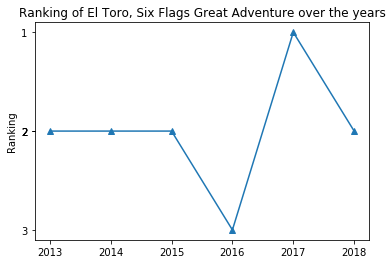

In [4]:
"""
Function that plots the ranking of a given roller coaster over time as a line.
Takes a roller coaster’s name and a ranking DataFrame as arguments
"""
def plotterbyranking(name,park,ranking):
    
    plantillin = ranking[(ranking.name==name) & (ranking.park==park)].reset_index()
    years = plantillin['year_of_rank']
    rank_ = plantillin['rank_']
    
    fig, ax = plt.subplots()
    ax.plot(years, rank_,marker="^")
    ax.set_yticks(rank_)
    ax.invert_yaxis()
    ax.set_ylabel('Ranking')
    ax.set_title("Ranking of {}, {} over the years".format(name, park))
    
    plt.show()

plotterbyranking('El Toro', 'Six Flags Great Adventure', wood)

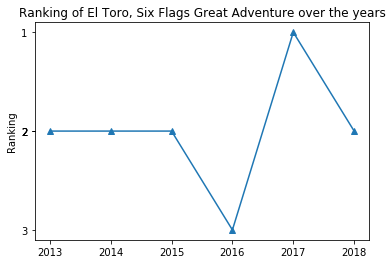

In [5]:
"""
Function that plots the ranking of a given roller coaster over time as a line.
Takes a roller coaster’s name and as the sole argument.
"""
def plotter(name,park): #Use this if you don't care about wood or steel
    
    plantillin = plantilla[(plantilla.name==name) & (plantilla.park==park)].reset_index()
    years = plantillin['year_of_rank']
    rank_ = plantillin['rank_']
    
    fig, ax = plt.subplots()
    ax.plot(years, rank_,marker="^")
    ax.invert_yaxis()
    ax.set_yticks(rank_)
    ax.set_ylabel('Ranking')
    ax.set_title("Ranking of {}, {} over the years".format(name, park))
    plt.show()

plotter('El Toro', 'Six Flags Great Adventure')

In [6]:
#Roller coasters witht the most and least amount of years ranked. 
booya = plantilla.groupby(['name','park']).year_of_rank.count().reset_index()
booya = booya.rename(columns={'year_of_rank':'years_ranked'})
booya = booya.sort_values('years_ranked', ascending=False).reset_index(drop=True)
booya

,name,park,years_ranked
0,Millennium Force,Cedar Point,6
1,Thunderhead,Dollywood,6
2,Expedition GeForce,Holiday Park,6
3,Outlaw Run,Silver Dollar City,6
4,Nitro,Six Flags Great Adventure,6
...,...,...,...
132,Superman: The Ride,Six Flags New England,1
133,Switchback,ZDTs,1
134,Grizzly,Kings Dominion,1
135,Grizzly (KD),Kings Dominion,1


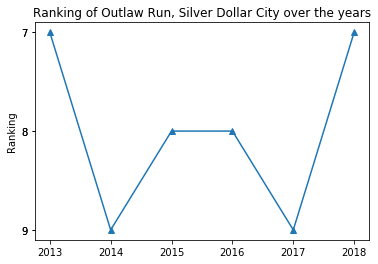

In [7]:
#We can plot any of the first 12 roller coasters to get the graphs with the most years, for example:
plotter('Outlaw Run', 'Silver Dollar City')

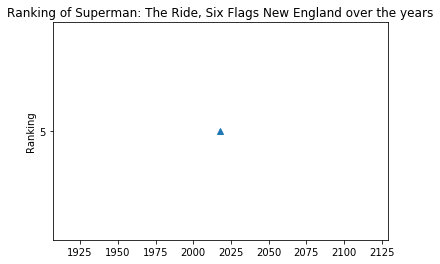

In [8]:
#The last 38 would be the most boring to plot, as they have only been ranked for one year. For example:
plotter('Superman: The Ride', 'Six Flags New England')

In [9]:
"""
Function that plots the ranking of two given roller coasters over time as lines. 
Takes both roller coasters’ names and their respective park as arguments.
"""

def twoplotter(name1,name2,park1,park2):
    
    plantillin1 = plantilla[(plantilla.name==name1) & (plantilla.park==park1)].reset_index()
    plantillin2 = plantilla[(plantilla.name==name2) & (plantilla.park==park2)].reset_index()
    
    years1 = plantillin1['year_of_rank']
    rank1 = plantillin1['rank_']
    
    years2 = plantillin2['year_of_rank']
    rank2 = plantillin2['rank_']
    
    #years = sorted(list(set(years1.append(years2)))) #Tártaro style
    
    
    fig, ax = plt.subplots()    
    ax.plot(years1, rank1,marker="^", label=name1)
    ax.plot(years2, rank2,marker="o", label=name2)
    ax.invert_yaxis()
    minimo = min(min(rank1), min(rank2))
    maximo = max(max(rank1), max(rank2))
    
    ax.set_yticks(range(minimo,maximo+1))
    ax.set_ylabel('Ranking')
    ax.set_title("Rankings of {}, {} and \n {}, {} over the years".format(name1, park1, name2, park2))
    ax.legend()
    plt.show()

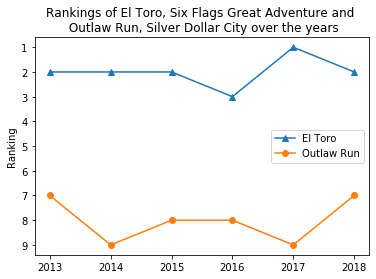

In [10]:
twoplotter('El Toro','Outlaw Run','Six Flags Great Adventure','Silver Dollar City')

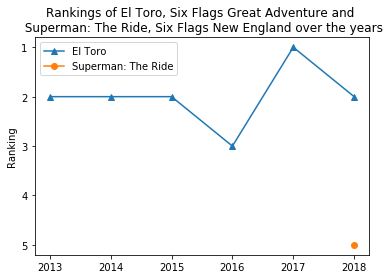

In [11]:
twoplotter('El Toro','Superman: The Ride','Six Flags Great Adventure','Six Flags New England')

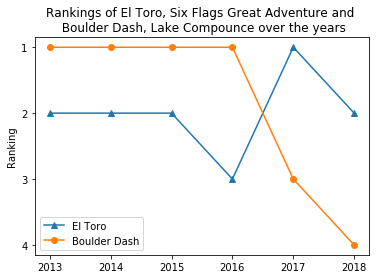

In [12]:
twoplotter('El Toro','Boulder Dash','Six Flags Great Adventure','Lake Compounce')

In [13]:
#Roller coasters ranked top 5 over the years.
top5 = wood[wood['rank_'] <= 5].sort_values('year_of_rank')
top5

,rank_,name,park,Location,supplier,year_build,points,year_of_rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
12,3,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1129,2014
13,4,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1036,2014
14,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,837,2014


In [14]:
"""
Function that plots the ranking of the top n ranked roller coasters over time as lines.
Take a number n and a ranking DataFrame as arguments.
"""

def topnplotter(n, ranking):
    top_n = ranking[ranking["rank_"] <= n].sort_values('year_of_rank')
    
    unq_coasters = top_n.groupby(['name','park']).rank_.count().reset_index()
    
    names = unq_coasters.name
    parks = unq_coasters.park
    years = top_n.year_of_rank.unique()
    
    fig,ax = plt.subplots(figsize=(9,9))
    
    for i in range(len(names)):
        plantilla_i = top_n[(top_n.name==names[i]) & (top_n.park==parks[i])]
        years_i = plantilla_i['year_of_rank']
        rank_i = plantilla_i['rank_']
        
        ax.plot(years_i, rank_i, label=names[i]+' '+parks[i], marker='o')
        ax.invert_yaxis()
    
    ax.set_title("Top 10 Rankings")
    ax.set_yticks([i for i in range(1,6)])
    ax.set_ylabel("Ranking")
    plt.legend()
    plt.show()    

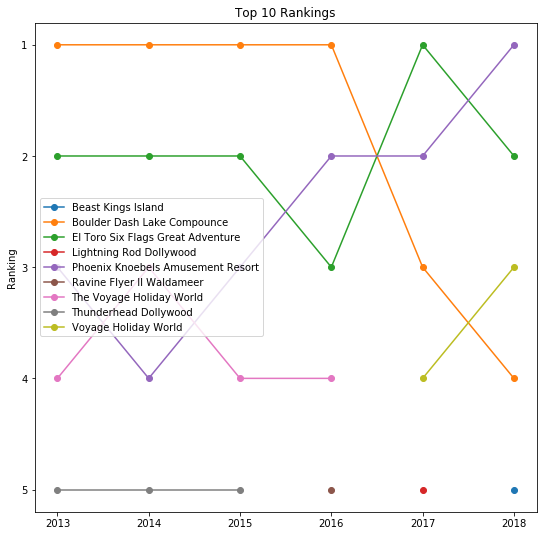

In [15]:
topnplotter(5, wood)

## Statistics on roller coasters themselves.
Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.


In [16]:
#loading the data
captain = pd.read_csv('roller_coasters.csv')
captain

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,NaN,NaN,NaN,0.0,na,Universal's Epic Universe,status.rumored


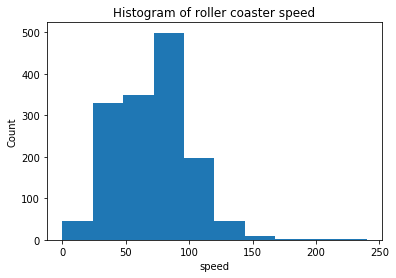

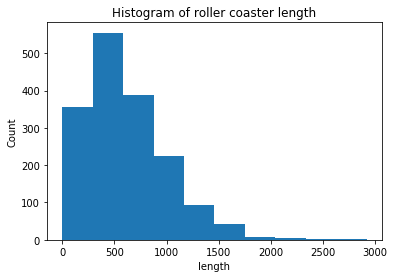

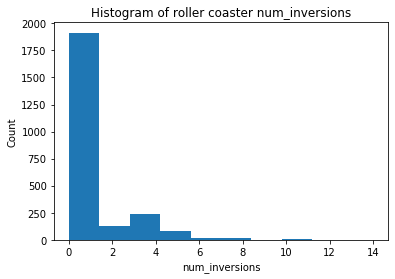

In [17]:
"""
Function that plots the histogram distribution of a column.
Takes in a DataFrame and a column of values.
"""
def histogram(df, column_name):
    
    dataframe =  df[column_name].dropna()
    
    fig, ax = plt.subplots()
    ax.hist(dataframe)
    ax.set_title('Histogram of roller coaster {}'.format(column_name))
    ax.set_ylabel("Count")
    ax.set_xlabel(column_name)
    
histogram(captain, 'speed')

histogram(captain, 'length')

histogram(captain, 'num_inversions')

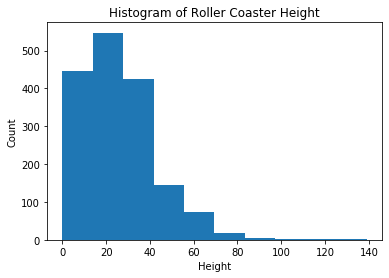

In [18]:
def plot_height_histogram(coaster_df):
    
    heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()

plot_height_histogram(captain)

In [55]:
"""
Function to plot scatter of any two columns
Takes in the roller coaster DataFrame and two column naes as arguments.
""" 
def scatterplot(coaster_df, colx, coly):
    column_x = coaster_df[colx]
    column_y = coaster_df[coly]
    
    fig, ax = plt.subplots()
    ax.scatter(column_x,column_y)
    ax.set_title('Scatter Plot of {} vs. {}'.format(colx,coly))
    ax.set_xlabel(colx)
    ax.set_ylabel(coly)
    plt.show()

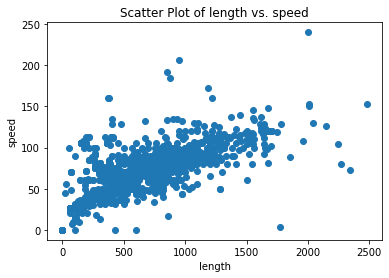

In [59]:
scatterplot(captain, 'length', 'speed')

In [60]:
# function to plot scatter of speed vs height
def scatterplot_height_speed(coaster_df):
    coaster_df = coaster_df[coaster_df['height'] < 140]
    fig, ax = plt.subplots()
    
    ax.scatter(coaster_df['height'],coaster_df['speed'])
    ax.set_title('Scatter Plot of Speed vs. Height')
    ax.set_xlabel('Height')
    ax.set_ylabel('Speed')
    plt.show()

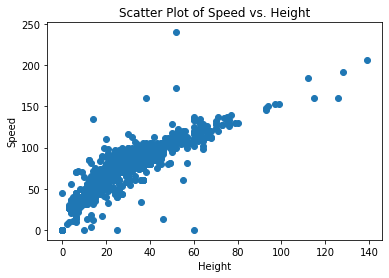

In [61]:
scatterplot_height_speed(captain)

In [70]:
"""
Function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park.
Takes the roller coaster DataFrame and an amusement park name as arguments
"""
def num_inversions(coaster_df, park_name):
    park_coasters = coaster_df[coaster_df.park==park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    
    fig,ax = plt.subplots()
    ax.bar(range(len(number_inversions)), number_inversions)
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names,rotation=90)
    ax.set_title('Number of Inversions Per Coaster at {}'.format(park_name))
    ax.set_xlabel('Roller Coaster')
    ax.set_ylabel('# of Inversions')
    plt.show()

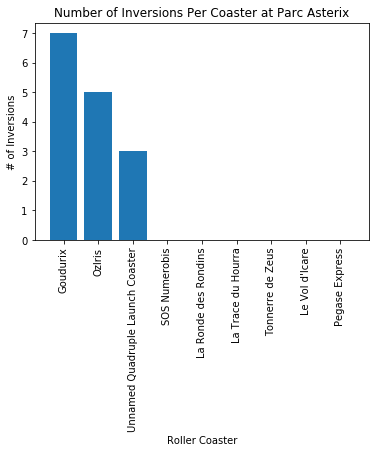

In [71]:
num_inversions(captain, "Parc Asterix")

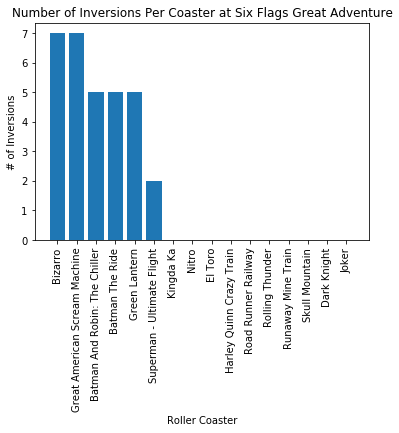

In [74]:
num_inversions(captain, 'Six Flags Great Adventure')

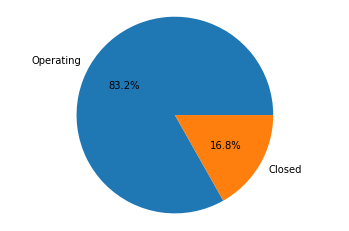

In [75]:
"""
Function plotting the roller coaster status as a pie chart.
"""
def pie_chart_status(coaster_df):
    operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
    closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
    num_operating_coasters = len(operating_coasters)
    num_closed_coasters = len(closed_coasters)

    status_counts = [num_operating_coasters,num_closed_coasters]
    fig, ax = plt.subplots()
    ax.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
    ax.axis('equal')
    plt.show()

pie_chart_status(captain)